In [ ]:
from keras.datasets import imdb
from keras import models, layers, optimizers
import numpy as np


In [ ]:
(train_data,train_label), (test_data,test_label) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
word_index2 = { value: key for key,value in word_index.items() }

In [ ]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i,sequences] = 1
  return results

In [ ]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [ ]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics='accuracy')

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 7s 75ms/step - loss: 0.5303 - accuracy: 0.7832 - val_loss: 0.4216 - val_accuracy: 0.8424
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3399 - accuracy: 0.8919 - val_loss: 0.3237 - val_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2549 - accuracy: 0.9181 - val_loss: 0.2942 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2091 - accuracy: 0.9288 - val_loss: 0.2774 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1757 - accuracy: 0.9428 - val_loss: 0.2866 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1523 - accuracy: 0.9508 - val_loss: 0.2810 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1313 - accuracy: 0.9586 - val_loss: 0.2891 - val_accuracy: 0.8864
Epoch 8/20
30

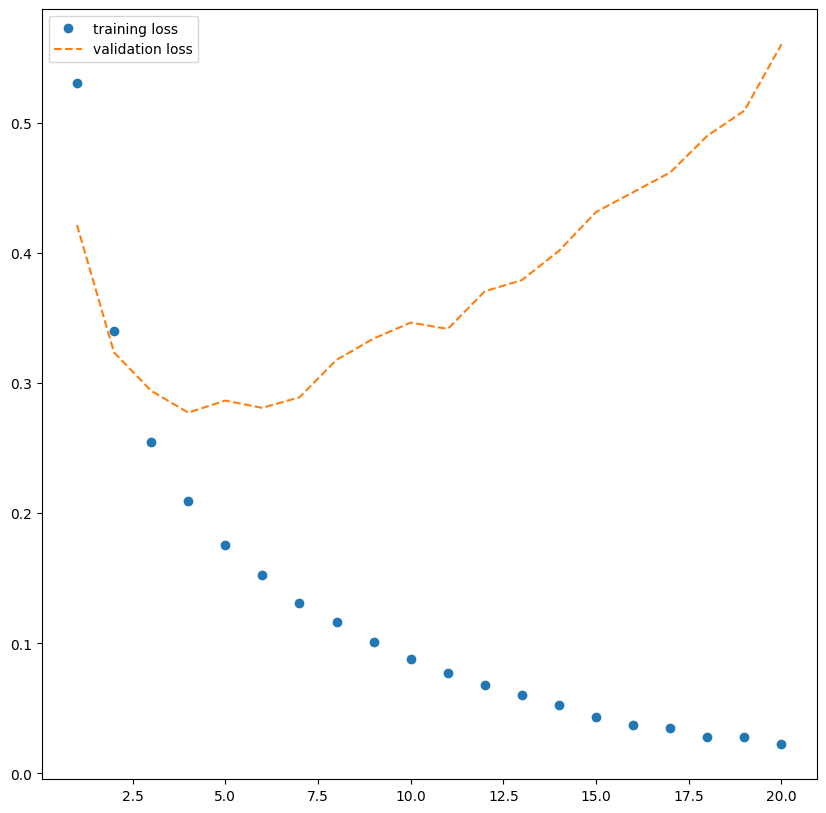

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training loss')
plt.plot(epoch,val_loss_values, '--',label='validation loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.5971 - accuracy: 0.8558


[0.5971102118492126, 0.8557999730110168]

**Smaller model**

In [ ]:
model_one = models.Sequential()
model_one.add(layers.Dense(4, activation='relu',input_shape=(10000,)))
model_one.add(layers.Dense(4, activation='relu'))
model_one.add(layers.Dense(1, activation='sigmoid'))
model_one.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics='accuracy')
history_one = model_one.fit(partial_x_train, partial_y_train, epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.6686 - accuracy: 0.5687 - val_loss: 0.6387 - val_accuracy: 0.6827
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6100 - accuracy: 0.7027 - val_loss: 0.5941 - val_accuracy: 0.7306
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5642 - accuracy: 0.7687 - val_loss: 0.5600 - val_accuracy: 0.7516
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5269 - accuracy: 0.8101 - val_loss: 0.5309 - val_accuracy: 0.8030
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4963 - accuracy: 0.8391 - val_loss: 0.5106 - val_accuracy: 0.8032
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4706 - accuracy: 0.8626 - val_loss: 0.4945 - val_accuracy: 0.8104
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4483 - accuracy: 0.8821 - val_loss: 0.4738 - val_accuracy: 0.8571
Epoch 8/20
30

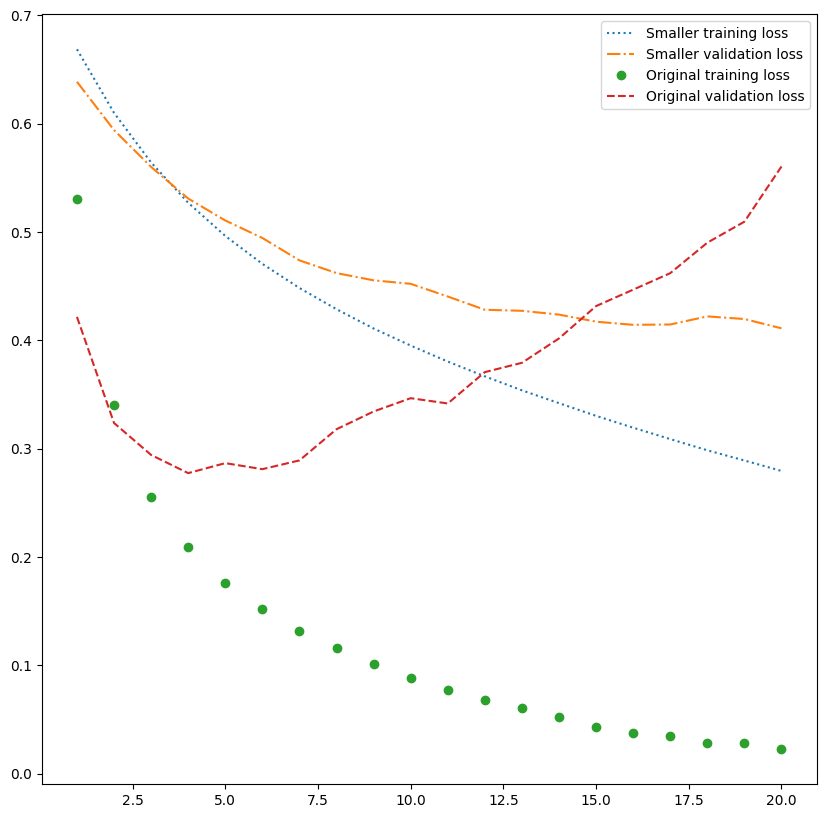

In [ ]:
history_dict = history_one.history
loss_values_one = history_dict['loss']
val_loss_values_one = history_dict['val_loss']
fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values_one)+1)
plt.plot(epoch,loss_values_one, ':',label='Smaller training loss')
plt.plot(epoch,val_loss_values_one, '-.',label='Smaller validation loss')
plt.plot(epoch,loss_values, 'o',label='Original training loss')
plt.plot(epoch,val_loss_values, '--',label='Original validation loss')
plt.legend()
plt.show()

**Regularizacion**

In [ ]:
from keras import regularizers

model_two = models.Sequential()
model_two.add(layers.Dense(16, activation='relu',input_shape=(10000,),kernel_regularizer=regularizers.l1(0.0001)))
model_two.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
model_two.add(layers.Dense(1, activation='sigmoid'))
model_two.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics='accuracy')
history_two = model_two.fit(partial_x_train, partial_y_train, epochs=20,batch_size=512,validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.7003 - accuracy: 0.7791 - val_loss: 0.5508 - val_accuracy: 0.8505
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4576 - accuracy: 0.8857 - val_loss: 0.4279 - val_accuracy: 0.8728
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3676 - accuracy: 0.9003 - val_loss: 0.3826 - val_accuracy: 0.8841
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3297 - accuracy: 0.9118 - val_loss: 0.3877 - val_accuracy: 0.8773
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3073 - accuracy: 0.9189 - val_loss: 0.3657 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2970 - accuracy: 0.9221 - val_loss: 0.4006 - val_accuracy: 0.8718
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2836 - accuracy: 0.9280 - val_loss: 0.3726 - val_accuracy: 0.8847
Epoch 8/20
30

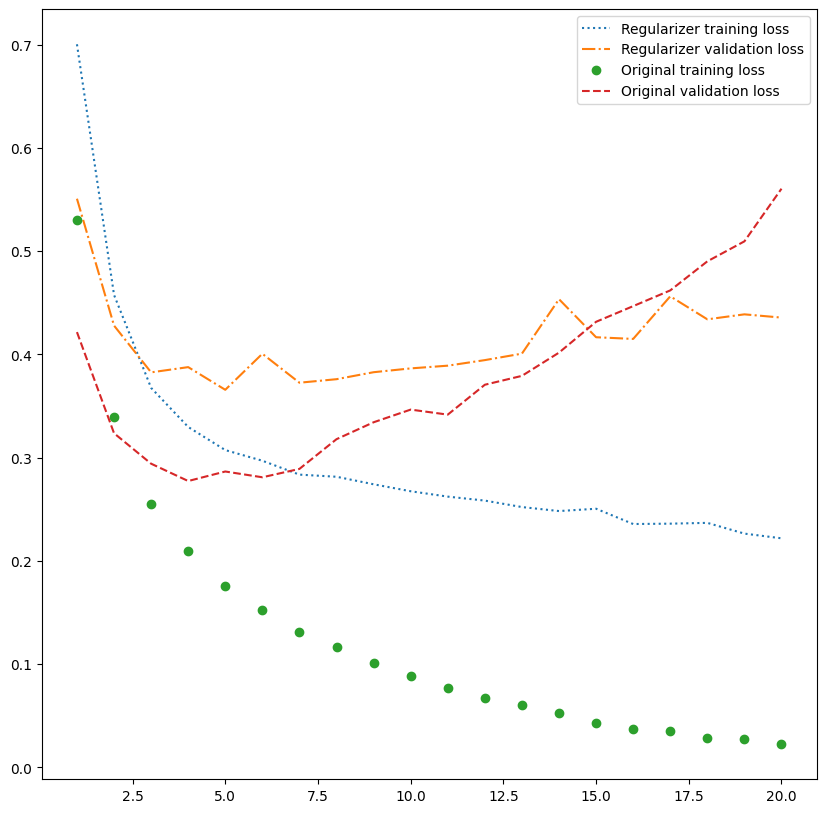

In [ ]:
history_dict = history_two.history
loss_values_two = history_dict['loss']
val_loss_values_two = history_dict['val_loss']
fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values_two)+1)
plt.plot(epoch,loss_values_two, ':',label='Regularizer training loss')
plt.plot(epoch,val_loss_values_two, '-.',label='Regularizer validation loss')
plt.plot(epoch,loss_values, 'o',label='Original training loss')
plt.plot(epoch,val_loss_values, '--',label='Original validation loss')
plt.legend()
plt.show()

**Dropout**

In [ ]:
model_three = models.Sequential()
model_three.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model_three.add(layers.Dropout(0.5))
model_three.add(layers.Dense(16, activation='relu'))
model_three.add(layers.Dropout(0.5))
model_three.add(layers.Dense(1, activation='sigmoid'))
model_three.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics='accuracy')
history_three = model_three.fit(partial_x_train, partial_y_train, epochs=20,batch_size=512,validation_data=(x_val,y_val))

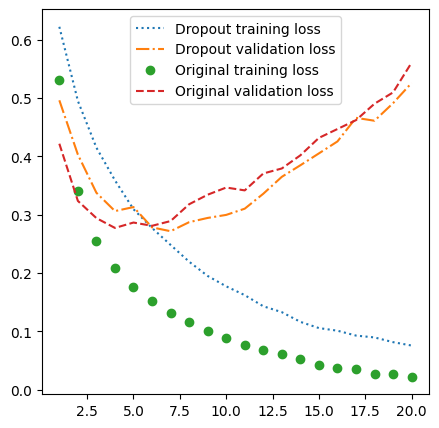

In [ ]:
history_dict = history_three.history
loss_values_three = history_dict['loss']
val_loss_values_three = history_dict['val_loss']
fig = plt.figure(figsize=(5,5))
epoch = range(1,len(loss_values_three)+1)
plt.plot(epoch,loss_values_three, ':',label='Dropout training loss')
plt.plot(epoch,val_loss_values_three, '-.',label='Dropout validation loss')
plt.plot(epoch,loss_values, 'o',label='Original training loss')
plt.plot(epoch,val_loss_values, '--',label='Original validation loss')
plt.legend()
plt.show()